In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
IMG_SIZE = 100

column_name = [
    'Container Ship',
    'Bulk Carrier',
    'Passengers Ship',
    'Ro-ro/passenger Ship',
    'Ro-ro Cargo',
    'Tug',
    'Vehicles Carrier',
    'Reefer',
    'Yacht',
    'Sailing Vessel',
    'Heavy Load Carrier',
    'Wood Chips Carrier',
    'Livestock Carrier',
    'Fire Fighting Vessel',
    'Patrol Vessel',
    'Platform',
    'Standby Safety Vessel',
    'Combat Vessel',
    'Training Ship',
    'Icebreaker',
    'Replenishment Vessel',
    'Tankers',
    'Fishing Vessels',
    'Supply Vessels',
    'Carrier/Floating',
    'Dredgers'
]

In [4]:
def getTrainData(img_size):
    img_dim = (img_size,img_size)

    train_csv = pd.read_csv('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/marvel_train.csv')
    train_arr_imgs = [img_to_array(load_img('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/Wall/'+str(img)+'.jpg', target_size=img_dim)) for img in train_csv.image]
    x_train = np.array(train_arr_imgs)

    train_cat = train_csv['category'].values
    y_train = to_categorical(train_cat-1)

    return x_train, y_train

def getTestData(img_size):
    img_dim = (img_size,img_size)

    test_csv = pd.read_csv('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/marvel_test.csv')
    #test_arr_imgs = [img_to_array(load_img('test/'+img, target_size=img_dim)) for img in test_csv.image]
    test_arr_imgs = []
    for img in test_csv.image:
        img_array = img_to_array(load_img('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/Wall/'+str(img)+'.jpg', target_size=img_dim))
        img_array = img_array/255.0
        test_arr_imgs.append(img_array)
    x_test = np.array(test_arr_imgs)

    test_cat = test_csv.category
    test_cv_y = test_cat-1
    y_test = np.array(test_cv_y)
    return x_test, y_test

In [5]:
def augData(x_train, y_train, batch_size):
    seed = 42
    random.seed = seed
    np.random.seed(seed=seed)
    #train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.15, height_shift_range=0.15, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=False, fill_mode='nearest')
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, seed=seed)
    return train_generator

In [6]:
from keras import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications import MobileNetV2

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)
base_model.trainable = False

model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024,activation='relu'),
  Dropout(rate=0.5),
  Dense(1024,activation='relu'),
  Dropout(rate=0.5),
  Dense(len(column_name), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                2

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [8]:
batch_size = 64
x_train, y_train = getTrainData(IMG_SIZE)
train_generator = augData(x_train, y_train, batch_size)

In [9]:
import time
startTime = time.time()

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train) // batch_size,
                              epochs=100)
endTime = time.time()

C:\Users\NCC\anaconda3\envs\env-11\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1824/1824 [==============================] - 145s 68ms/step - loss: 2.3839 - accuracy: 0.3052
Epoch 2/100
1824/1824 [==============================] - 571s 313ms/step - loss: 2.0150 - accuracy: 0.3986
Epoch 3/100
1824/1824 [==============================] - 106s 58ms/step - loss: 1.9623 - accuracy: 0.4167
Epoch 4/100
1824/1824 [==============================] - 100s 55ms/step - loss: 1.9191 - accuracy: 0.4303
Epoch 5/100
1824/1824 [==============================] - 95s 52ms/step - loss: 1.9018 - accuracy: 0.4322
Epoch 6/100
1824/1824 [==============================] - 92s 50ms/step - loss: 1.8802 - accuracy: 0.4405
Epoch 7/100
1824/1824 [==============================] - 90s 49ms/step - loss: 1.8617 - accuracy: 0.4491
Epoch 8/100
1824/1824 [==============================] - 89s 49ms/step - loss: 1.8427 - accuracy: 0.4530
Epoch 9/100
1824/1824 [==============================] - 91s 50ms/step - loss: 1.8354 - accuracy: 0.4555
Epoch 10/100
1824/1824 [==========================

1824/1824 [==============================] - 69s 38ms/step - loss: 1.6170 - accuracy: 0.5191
Epoch 78/100
1824/1824 [==============================] - 72s 40ms/step - loss: 1.6121 - accuracy: 0.5213
Epoch 79/100
1824/1824 [==============================] - ETA: 0s - loss: 1.6077 - accuracy: 0.52 - 69s 38ms/step - loss: 1.6077 - accuracy: 0.5209
Epoch 80/100
1824/1824 [==============================] - 69s 38ms/step - loss: 1.6023 - accuracy: 0.5250
Epoch 81/100
1824/1824 [==============================] - 69s 38ms/step - loss: 1.6029 - accuracy: 0.5232
Epoch 82/100
1824/1824 [==============================] - 69s 38ms/step - loss: 1.6114 - accuracy: 0.5217
Epoch 83/100
1824/1824 [==============================] - 69s 38ms/step - loss: 1.6163 - accuracy: 0.5193
Epoch 84/100
1824/1824 [==============================] - 69s 38ms/step - loss: 1.5932 - accuracy: 0.5246
Epoch 85/100
1824/1824 [==============================] - 69s 38ms/step - loss: 1.5988 - accuracy: 0.5230
Epoch 86/100
1824

In [10]:
name = 'MobileNetV2_R16-e100_Dropout_NoAug'
model_name = 'Mobile Net V2'

In [11]:
def saveH5(model,name):
    model.save_weights(name+'_model-save-wieghts.h5')
    model.save(name+'_model-save.h5')
saveH5(model,name)

In [12]:
def saveHistory(history, name):
    hist_df = pd.DataFrame(history.history) 
    hist_json_file = name+'_history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
    hist_csv_file = name+'_history.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
saveHistory(history,name)

In [13]:
def printTime(startTime, endTime):
    print("Strat time = "+str(startTime))
    print("End time = "+str(endTime))
    print("Use time = "+str(endTime-startTime))
printTime(startTime, endTime)

Strat time = 1610534645.1917393
End time = 1610542874.2538416
Use time = 8229.06210231781


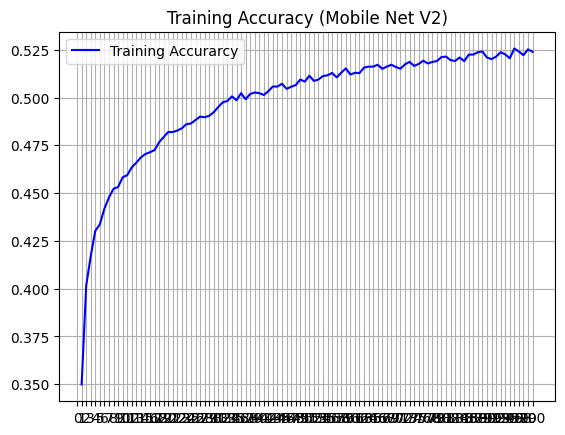

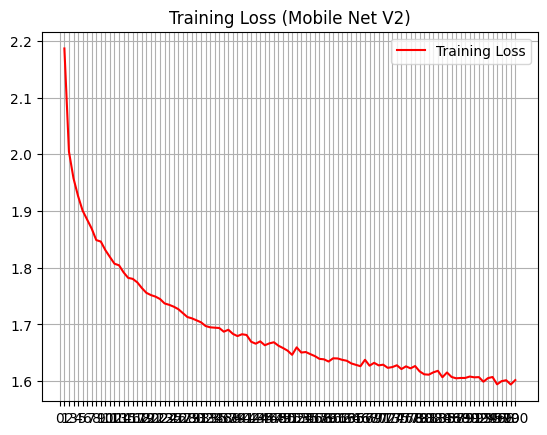

In [14]:
def plotAccuracyLoss(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    #Train and validation accuracy
    plt.style.use('default')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    #plt.yticks(np.arange(0, 1))
    plt.plot(epochs, acc, 'b', label='Training Accurarcy')
    plt.title('Training Accuracy ('+model_name+')')
    plt.legend()
    plt.grid(True)
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    plt.title('Training Loss ('+model_name+')')
    plt.legend()
    plt.show()
plotAccuracyLoss(history)

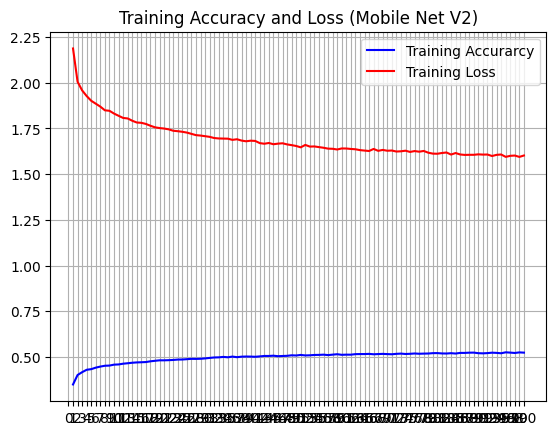

In [15]:
def plotBothAccuracyLoss(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1, len(acc) + 1)

    #Train and validation accuracy
    plt.style.use('default')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    #plt.yticks(np.arange(0, 1))
    plt.plot(epochs, acc, 'b', label='Training Accurarcy')
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.grid(True)
    plt.xticks(np.arange(0, len(acc)+1, 1.0))
    plt.title('Training Accuracy and Loss ('+model_name+')')
    plt.legend()
    plt.show()
plotBothAccuracyLoss(history)

In [16]:
x_test, y_test = getTestData(IMG_SIZE)

In [17]:
y_pred = model.predict(x_test)

In [18]:
def convertPred1D(y_pred):
    get_argmax = []
    for i in range(len(y_pred)):
        get_argmax.append(np.argmax(y_pred[i]))
    return get_argmax
y_pred1d = convertPred1D(y_pred)

In [19]:
def savePrediction(pred, name):
    test_csv = pd.read_csv('C:/Users/NCC/Desktop/thesis/dataset/marvel2016/1_all/marvel_test.csv')
    test_dict = {'image': test_csv.image, 'y_true': test_csv.category-1, 'y_pred': pred}
    df_pred = pd.DataFrame(test_dict)
    export_pred = df_pred.to_csv(r''+name+'_y-prediction.csv', index = None, header=True)
savePrediction(y_pred1d, name)

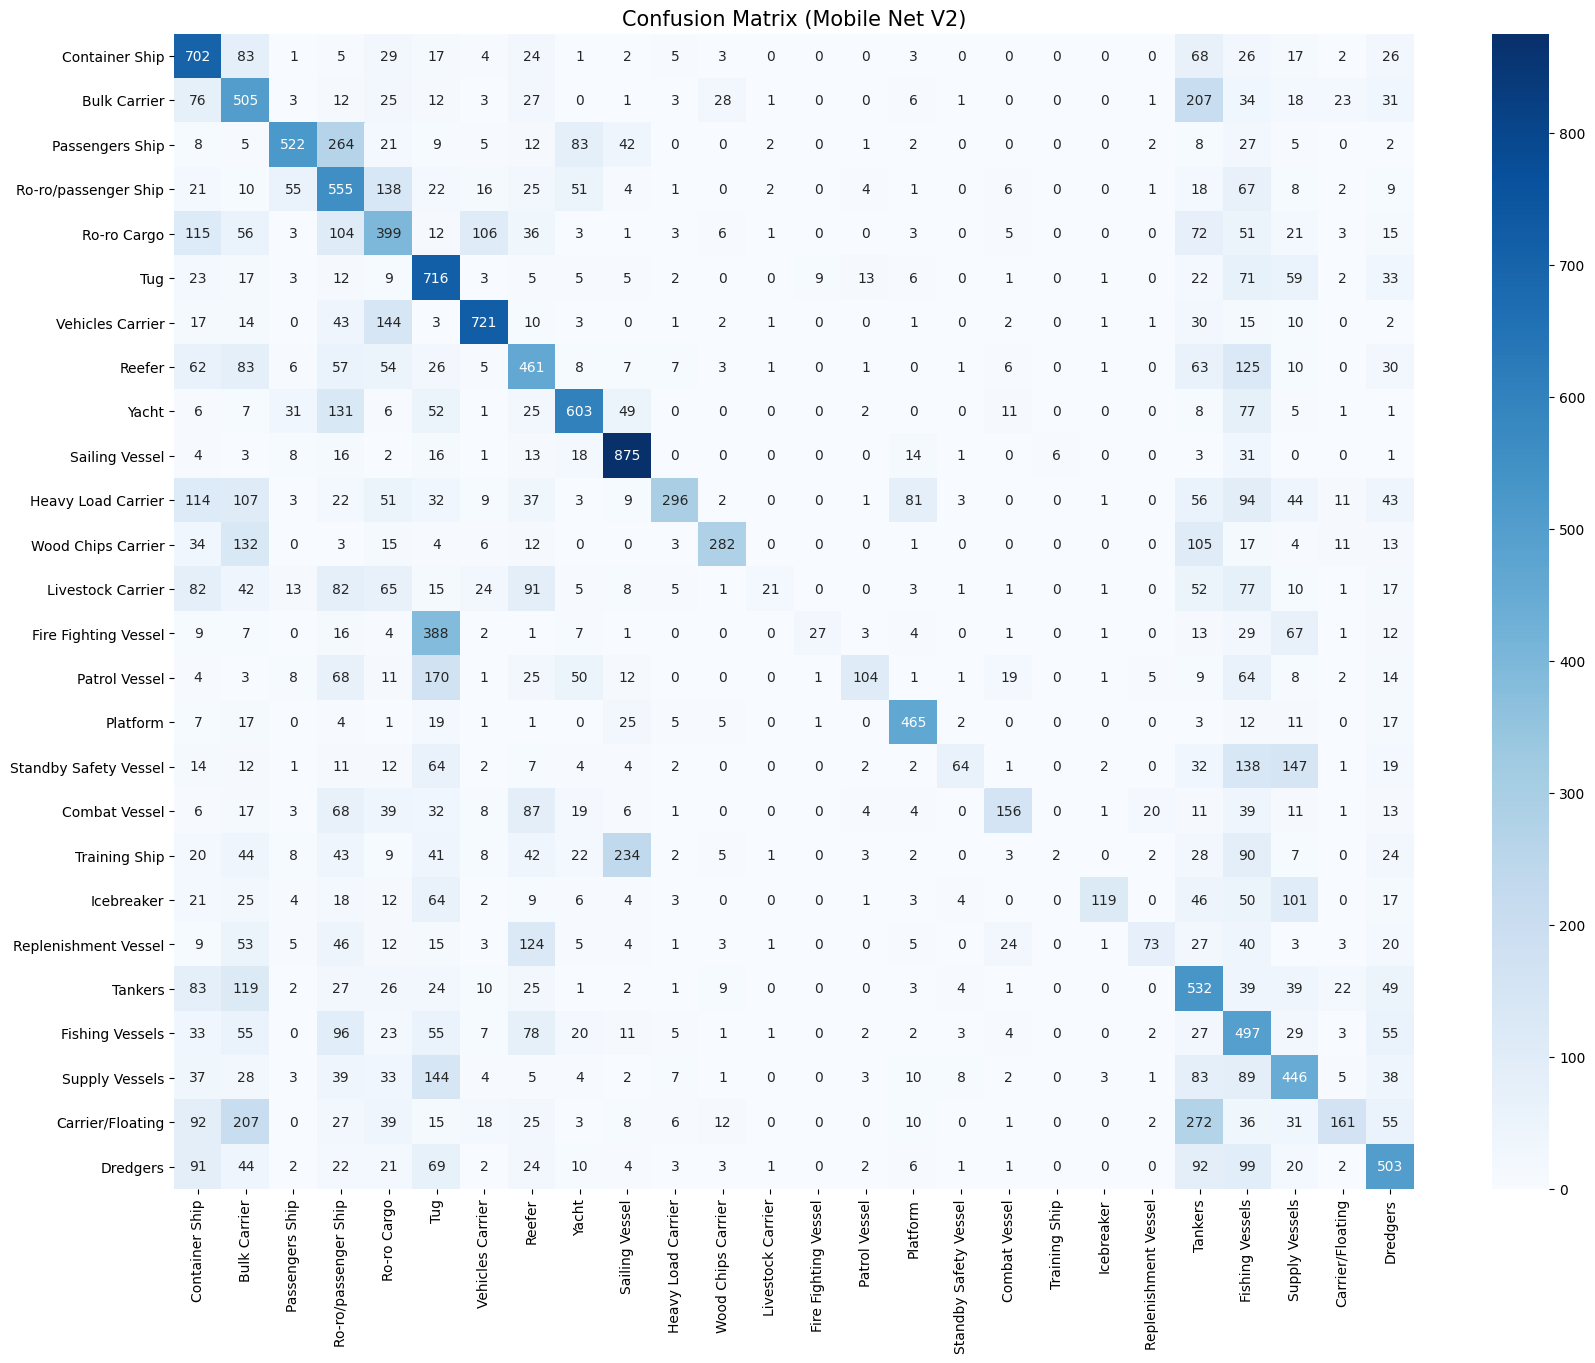

In [20]:
def plotConfusionMatrix(array, name):
    df_cm = pd.DataFrame(array, index = column_name, columns = column_name)
    plt.figure(figsize=(20,15))
    sn.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
    plt.title('Confusion Matrix ('+name+')',fontsize = 15)
    plt.show()
plotConfusionMatrix(confusion_matrix(y_test, y_pred1d),model_name)

In [21]:
confusion_matrix(y_test, y_pred1d)

array([[702,  83,   1,   5,  29,  17,   4,  24,   1,   2,   5,   3,   0,
          0,   0,   3,   0,   0,   0,   0,   0,  68,  26,  17,   2,  26],
       [ 76, 505,   3,  12,  25,  12,   3,  27,   0,   1,   3,  28,   1,
          0,   0,   6,   1,   0,   0,   0,   1, 207,  34,  18,  23,  31],
       [  8,   5, 522, 264,  21,   9,   5,  12,  83,  42,   0,   0,   2,
          0,   1,   2,   0,   0,   0,   0,   2,   8,  27,   5,   0,   2],
       [ 21,  10,  55, 555, 138,  22,  16,  25,  51,   4,   1,   0,   2,
          0,   4,   1,   0,   6,   0,   0,   1,  18,  67,   8,   2,   9],
       [115,  56,   3, 104, 399,  12, 106,  36,   3,   1,   3,   6,   1,
          0,   0,   3,   0,   5,   0,   0,   0,  72,  51,  21,   3,  15],
       [ 23,  17,   3,  12,   9, 716,   3,   5,   5,   5,   2,   0,   0,
          9,  13,   6,   0,   1,   0,   1,   0,  22,  71,  59,   2,  33],
       [ 17,  14,   0,  43, 144,   3, 721,  10,   3,   0,   1,   2,   1,
          0,   0,   1,   0,   2,   0,   1,   

In [22]:
def printReport(y_test, y_pred, name):
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    df_rp = pd.DataFrame(report).transpose()
    export_rp = df_rp.to_csv(r''+name+'_cls-report.csv', index = None, header=True)
printReport(y_test, y_pred1d, name)

              precision    recall  f1-score   support

           0       0.42      0.69      0.52      1018
           1       0.30      0.50      0.37      1017
           2       0.76      0.51      0.61      1020
           3       0.31      0.55      0.40      1016
           4       0.33      0.39      0.36      1015
           5       0.35      0.70      0.47      1017
           6       0.74      0.71      0.72      1021
           7       0.37      0.45      0.41      1017
           8       0.65      0.59      0.62      1016
           9       0.66      0.86      0.75      1012
          10       0.82      0.29      0.43      1019
          11       0.77      0.44      0.56       642
          12       0.64      0.03      0.06       617
          13       0.71      0.05      0.09       593
          14       0.71      0.18      0.29       581
          15       0.73      0.78      0.75       596
          16       0.68      0.12      0.20       541
          17       0.64    